In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-11-24 06:27:17.200697: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-11-24 06:27:24.661210: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-24 06:27:24.761933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-24 06:27:24.762375: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-24 06:27:24.762418: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [16]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 5


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)

reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

# Custom CNN model

Training with Data Augmentation

In [8]:
'''
model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)
'''

'\nmodel_A = get_model_A(0.0, True, 0.0)\nhistory = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)\nshow_plot(history, 0.0)\ntest_accuracy(model_A, test_dataset)\nprint_tsne(model_A, test_dataset, 2500)\n'

In [9]:
'''
model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)
'''

'\nmodel_B = get_model_B(0.0, True, 0.0)\nhistory = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)\nshow_plot(history, 0.0)\ntest_accuracy(model_B, test_dataset)\nprint_tsne(model_B, test_dataset, 2500)\n'

# MobileNetV2 Model From Scratch

Training model, epochs:  5
Epoch 1/5
1200/1200 [==============================] - 40s 32ms/step - loss: 0.3704 - accuracy: 0.8178 - val_loss: 0.2691 - val_accuracy: 0.8753


2022-11-24 06:38:01.410445: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 2/5
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2494 - accuracy: 0.8913 - val_loss: 0.2392 - val_accuracy: 0.8941


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 3/5
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2280 - accuracy: 0.9025 - val_loss: 0.2272 - val_accuracy: 0.9070


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 4/5
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2183 - accuracy: 0.9071 - val_loss: 0.2217 - val_accuracy: 0.9058


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 5/5
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2103 - accuracy: 0.9122 - val_loss: 0.2175 - val_accuracy: 0.9080


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets


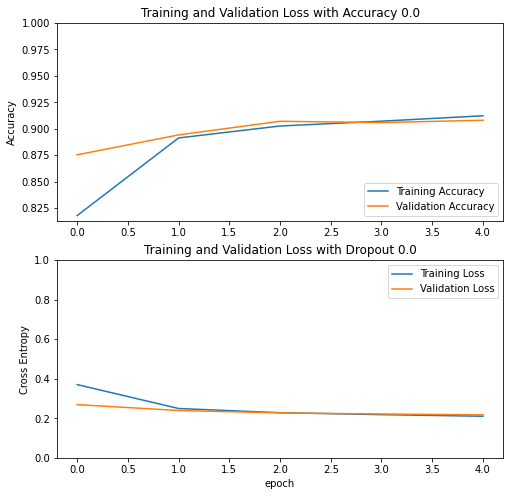

258/258 [==============================] - 6s 25ms/step - loss: 0.2145 - accuracy: 0.9062
Test accuracy : 0.9061626195907593


In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

base_learning_rate = 0.0001
baseMobile, mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281  

In [ ]:
show_report(mobileNetModelSc, test_data_generator)

In [ ]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(mobileNetModelSc, test_data_generator)

In [ ]:
incorrect_files

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output-MobileNet-Scratch/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [ ]:
# process_results(correct_files, incorrect_files, "test")

# DenseNet model

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=(160, 160, 3))
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    show_plot(acc, val_acc, loss, val_loss)

    print_tsne(dense_model, test_dataset)

In [ ]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [ ]:
# do_transfer_learning(0.0, False, 0.0)

In [ ]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0, denseNetModel, base_dense_model)

In [ ]:
show_report(denseNetModel, test_data_generator)

In [ ]:
correct, incorrect, dense_correct_files, dense_incorrect_files = show_confusion_matrix(denseNetModel, test_data_generator)

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output-DenseNet-TF-3/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [ ]:
# process_results(dense_correct_files, dense_incorrect_files, "test")

In [ ]:
len(dense_incorrect_files)

In [ ]:
len(incorrect_files)

In [ ]:
len(list(set(incorrect_files) - set(dense_incorrect_files)))

In [ ]:
len(list(set(dense_incorrect_files) - set(incorrect_files)))

In [ ]:
len(list(set(dense_incorrect_files) & set(incorrect_files)))